In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
print(f"train size: {train.shape}")
print(f"test size: {test.shape}")

train size: (1460, 81)
test size: (1459, 80)


# 1. Data Pre-procesing
---

### Target Variable

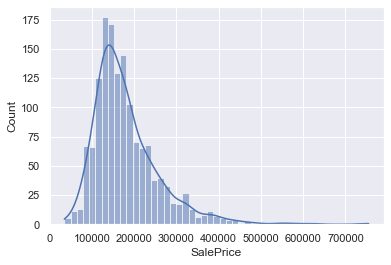

In [7]:
sns.histplot(train, x="SalePrice", kde="True")

In [8]:
print("Kurtosis: {}".format(train["SalePrice"].kurt()))
print("Skewness: {}".format(train["SalePrice"].skew()))

Kurtosis: 6.536281860064529
Skewness: 1.8828757597682129


**correlation matrix**

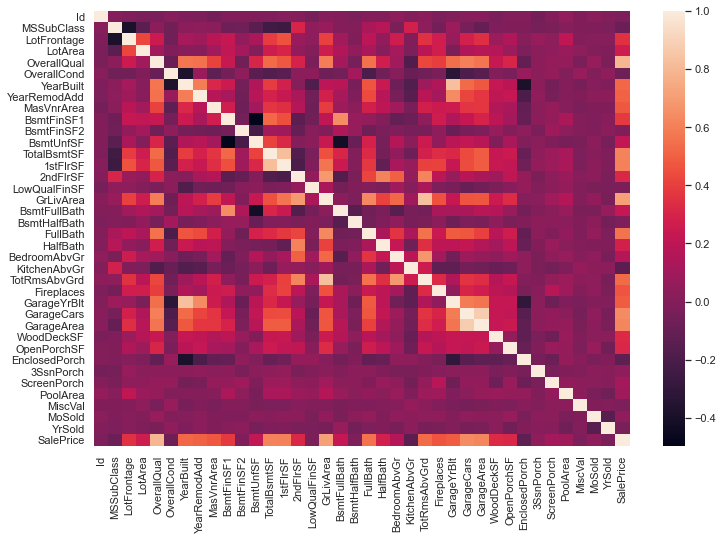

In [9]:
corrmat = train.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corrmat, vmax=1)

best estimators for  SalePrice

In [10]:
best_features = corrmat["SalePrice"].nlargest(10)
best_features

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

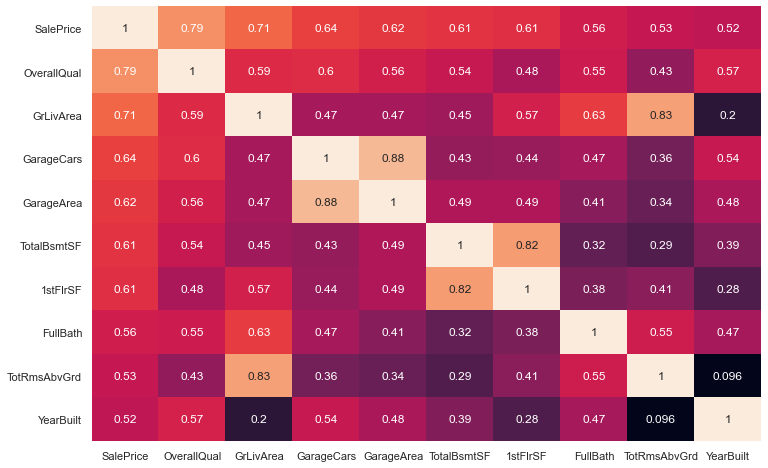

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(corrmat.loc[best_features.index, best_features.index], cbar=False, annot=True)

In [12]:
best_features.index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

drop some feature correlated with each other

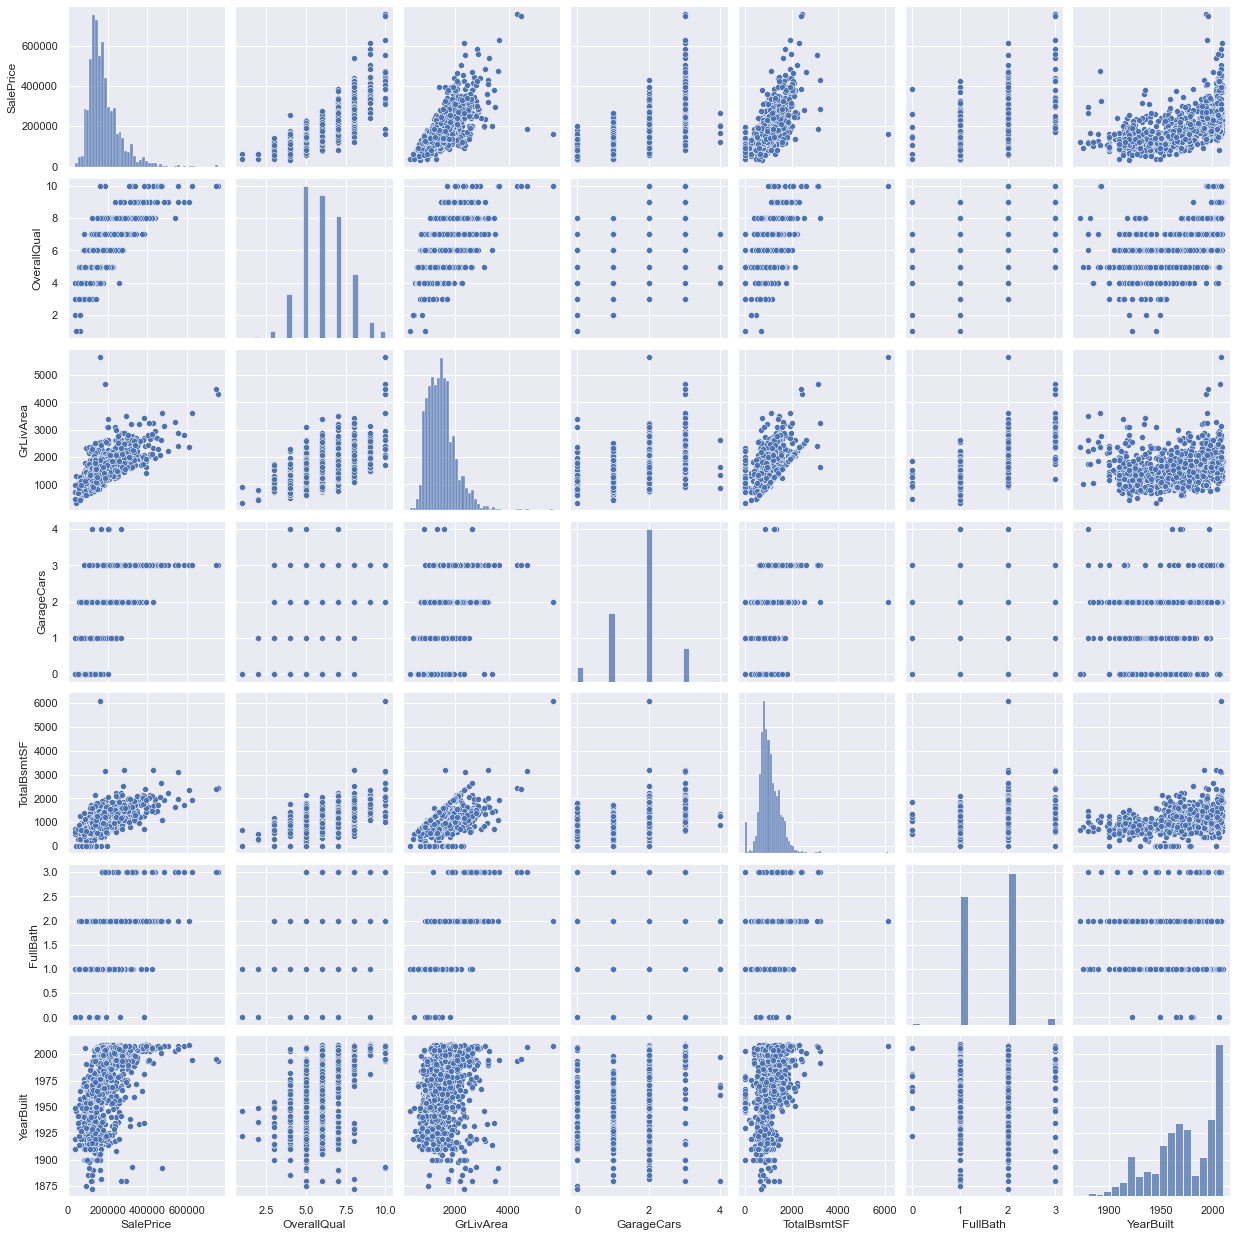

In [13]:
best_index = best_features.index.drop(["1stFlrSF", "GarageArea", "TotRmsAbvGrd"])
sns.pairplot(train[best_index])

**Drop outliers**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


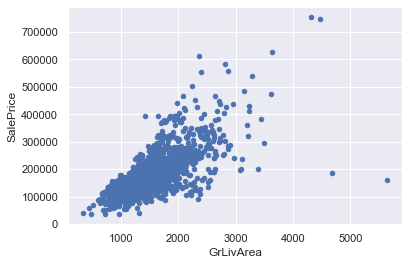

In [14]:
train.plot.scatter(y="SalePrice", x="GrLivArea")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


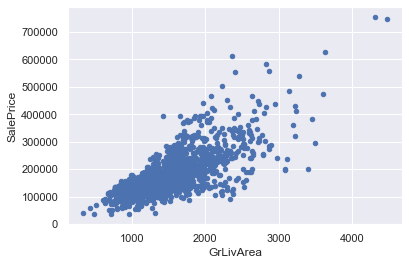

In [15]:
outliers = train[(train["GrLivArea"]>4000) & (train["SalePrice"]<300000)].index
train.drop(outliers, inplace=True)
train.plot.scatter(x="GrLivArea", y="SalePrice")

/Users/axel/ml/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


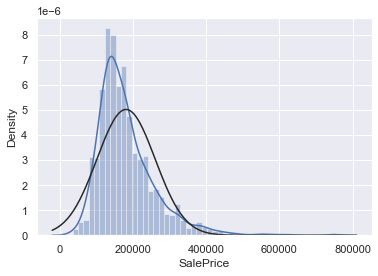

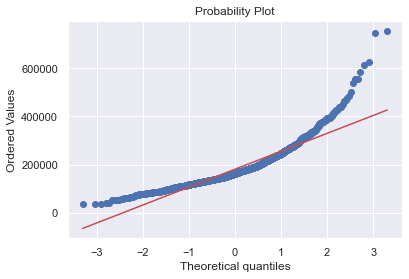

In [16]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

# histogram
plt.figure()
sns.distplot(train["SalePrice"], fit=norm)

# Normal probability plot 
plt.figure()
_ = stats.probplot(train["SalePrice"], plot=plt)
plt.show()

**Log transformation of the target varaible** (to be closer to normality)

In [17]:
train["SalePrice"] = np.log(train["SalePrice"])

/Users/axel/ml/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


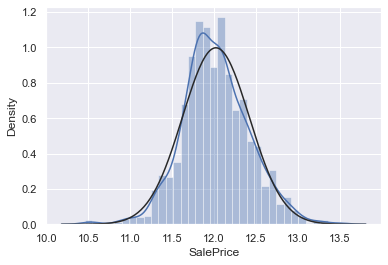

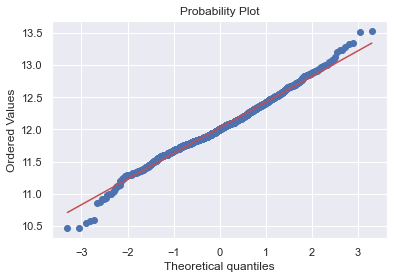

In [18]:
# histogram
plt.figure()
sns.distplot(train["SalePrice"], fit=norm)

# Normal probability plot 
plt.figure()
_ = stats.probplot(train["SalePrice"], plot=plt)
plt.show()

### Features engineering

Concatenate the train and test set

In [255]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

train_index = train.Id.values
test_index = test.Id.values

dataset = pd.concat([train,test])
# dataset.drop("SalePrice", axis=1, inplace=True)
dataset.set_index("Id", inplace=True)

print(f"TRAINING SIZE {train.shape}")
print(f"TESTING SIZE {test.shape}")
print("---")
print(f"CONCATENATION {dataset.shape}")

TRAINING SIZE (1460, 81)
TESTING SIZE (1459, 80)
---
CONCATENATION (2919, 80)


**Missing values (NaN)**

In [256]:
missing_rate = (dataset.isnull().sum() / dataset.shape[0]) * 100
missing_data = pd.concat([dataset.isnull().sum(), missing_rate], axis=1, keys=["total", "rate"])
missing_data.sort_values(by="total", ascending=False).head(35)

,total,rate
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
SalePrice,1459,49.982871
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageCond,159,5.447071
GarageFinish,159,5.447071
GarageQual,159,5.447071


In [257]:
dataset.isna().any(0).value_counts()

False    45
True     35
dtype: int64

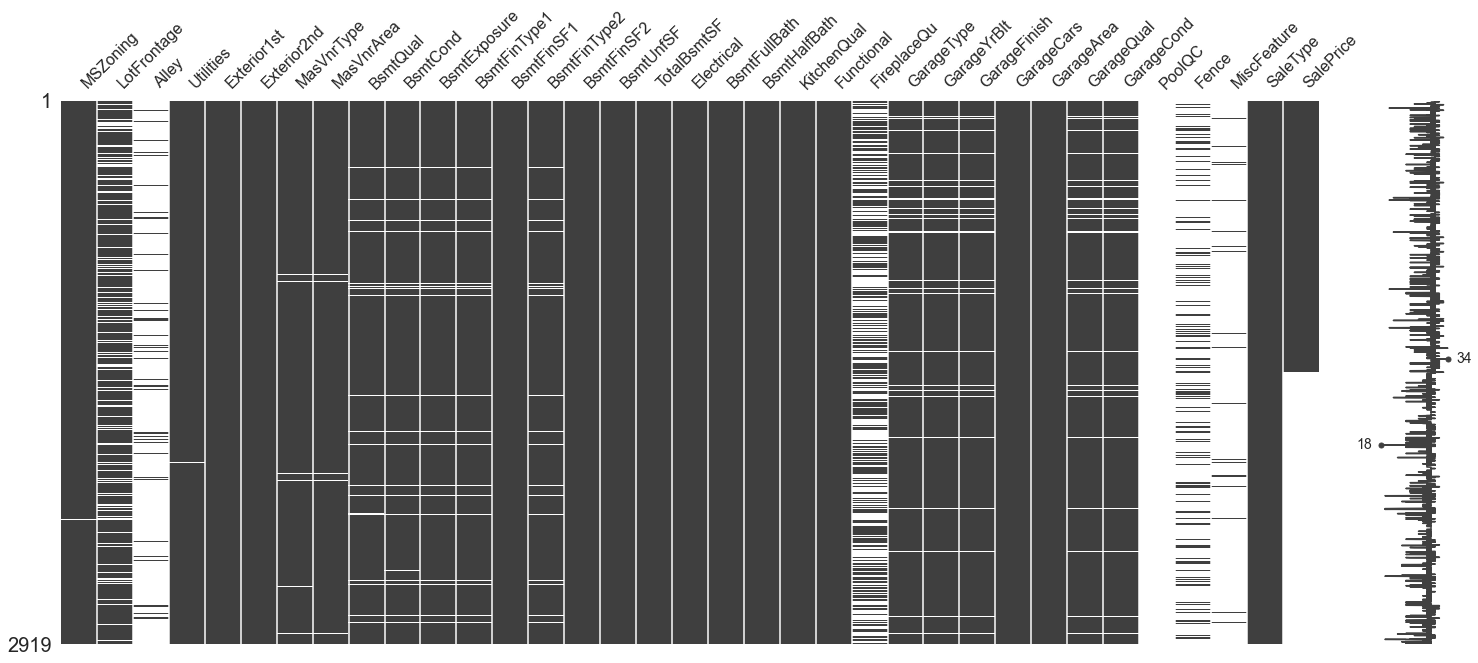

In [258]:
import missingno as msno
col_with_nan = dataset.loc[:,dataset.isna().any(0)]
msno.matrix(col_with_nan)

→ NaN values give info about house's features:
- *Basement*: 97.5%
- *Garage*: 95%
- *Fireplace*: 83%
- *Fence*: 20%
- *Alley*: 7%
- *Pool*: 1%

**Imputing missing values**

replace by None

In [259]:
replace_by_none = [
    "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "MasVnrType", "MSSubClass", 
    "GarageCond", "GarageType", "GarageFinish", "GarageQual",
    "BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtCond", "BsmtFinType1"]

for col in replace_by_none:
    dataset[col].fillna("None", inplace=True)

replace by 0

In [260]:
replace_by_zero = ["MasVnrArea", "GarageYrBlt", "GarageArea", "GarageCars", 
                   "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]

for col in replace_by_zero:
    dataset[col].fillna(0, inplace=True)
dataset["MasVnrArea"].fillna(0, inplace=True)

**LotFrontage**: Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood. 

*- idea from this [beautifull notebook](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)*

In [261]:
dataset["LotFrontage"] = dataset.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

replace by most frequent

In [262]:
replace_by_mode = ["Electrical", "SaleType", "Exterior1st", 
                   "Exterior2nd", "KitchenQual", "MSZoning", "Functional"]
for col in replace_by_mode:
    dataset[col] .fillna(dataset[col].mode()[0], inplace=True)

**Utilities** : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [263]:
dataset["Utilities"].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [264]:
dataset.drop('Utilities', axis=1, inplace=True)

Check if there is reamining missing value

In [265]:
dataset.drop("SalePrice", axis=1).isna().sum().sum()

0

It remains no missing value.

### More features engineering

In [266]:
dataset.dtypes.value_counts()

object     42
int64      25
float64    12
dtype: int64

**transform numerical variables which are categorical**

In [267]:
dataset["MSSubClass"] = dataset["MSSubClass"].astype("str")

dataset["MoSold"] = dataset["MoSold"].astype("str")
# dataset["YrSold"] = dataset["YrSold"].astype("str")

**label encoding some categorical data** *(contain information in their ordering)*

In [268]:
from sklearn.preprocessing import LabelEncoder

order_mater = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", 
               "HeatingQC", "CentralAir", "KitchenQual", "FireplaceQu", "GarageFinish", "GarageQual",  
               "GarageCond", "PoolQC", "BsmtFinType1", "BsmtFinType1", "Functional", "LandSlope", 
               "LotShape", "PavedDrive"]

for col in order_mater:
    lbe = LabelEncoder()
    dataset[col] = lbe.fit_transform(dataset[col].values)

In [269]:
from sklearn.preprocessing import OrdinalEncoder

order_mater = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", 
               "HeatingQC", "CentralAir", "KitchenQual", "FireplaceQu", "GarageFinish", "GarageQual",  
               "GarageCond", "PoolQC", "BsmtFinType1", "BsmtFinType1", "Functional", "LandSlope", 
               "LotShape", "PavedDrive"]

cat_to_int = OrdinalEncoder(dtype="int")
dataset[order_mater] = cat_to_int.fit_transform(dataset[order_mater].values)

**create new feature** *(by combining existing one)*

In [270]:
dataset["OverallGrade"] = dataset["OverallQual"] * dataset["OverallCond"]
dataset["GarageGrade"] = dataset["GarageQual"] * dataset["GarageCond"]
dataset["ExterGrade"] = dataset["ExterQual"] * dataset["ExterCond"]
dataset["TotalBath"] = dataset["BsmtFullBath"] + 0.5 * dataset["BsmtHalfBath"] + \
                       dataset["FullBath"] + 0.5 * dataset["HalfBath"]
dataset["TotalSF"] = dataset["TotalBsmtSF"] + dataset["1stFlrSF"] + dataset["2ndFlrSF"]

In [271]:
dataset.shape

(2919, 84)

In [272]:
np.abs(dataset.corr().SalePrice).sort_values(ascending=False)[:20]

SalePrice       1.000000
OverallQual     0.790982
TotalSF         0.782260
GrLivArea       0.708624
GarageCars      0.640409
ExterQual       0.636884
TotalBath       0.631731
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
BsmtQual        0.593734
KitchenQual     0.589189
OverallGrade    0.565294
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
ExterGrade      0.469600
Fireplaces      0.466929
Name: SalePrice, dtype: float64

#### Note:
- `TotalSF` is highly correlated with the SalePrice  
- `TotalSF`, `TotalBath` `ExterGrade` perform better than their detailled features
- creating order in `ExterQual` improve the correlation with SalePrice

**Skewed features**

In [273]:
num_col = dataset.select_dtypes(exclude="object").columns
skewness = np.abs(dataset[num_col].skew()).sort_values(ascending=False)
skewness.head(20)

MiscVal          21.958480
PoolQC           20.734650
PoolArea         16.907017
LotArea          12.829025
LowQualFinSF     12.094977
3SsnPorch        11.381914
LandSlope         4.977715
KitchenAbvGr      4.304467
BsmtFinSF2        4.148275
Functional        4.057843
EnclosedPorch     4.005950
ScreenPorch       3.948723
BsmtHalfBath      3.933616
GarageYrBlt       3.908213
GarageCond        3.597639
CentralAir        3.460801
GarageQual        3.075732
PavedDrive        2.980616
BsmtCond          2.864057
MasVnrArea        2.614936
dtype: float64

In [274]:
skewness = skewness[skewness > 0.75]
print(f"{skewness.count()} features are skewed!")

38 features are skewed!


get closer to normality with [Box cox transformation ](https://www.statisticshowto.com/box-cox-transformation/).  

**Why not using log on skewed estimators to get normality?**  
↳ Beacause box cox give slightly better result

In [275]:
from scipy.special import boxcox1p

skewed_features = skewness.index
lmbda = 0.15
for feat in skewed_features:
    dataset[feat] = boxcox1p(dataset[feat], lmbda)

In [276]:
# after boxcox: how many skewed estimator
num_col = dataset.select_dtypes(exclude="object").columns
skewness = np.abs(dataset[num_col].skew()).sort_values(ascending=False)
skewness = skewness[skewness > 0.75]
print(f"{skewness.count()} features are skewed!")
skewness.head(20)

26 features are skewed!


PoolQC          22.537637
PoolArea        15.127201
3SsnPorch        8.929411
LowQualFinSF     8.748639
MiscVal          5.599938
Functional       5.129292
LandSlope        4.534366
GarageCond       4.178222
TotalBsmtSF      3.963311
GarageYrBlt      3.927363
BsmtHalfBath     3.790191
KitchenAbvGr     3.700727
CentralAir       3.460801
GarageQual       3.443798
BsmtCond         3.231323
PavedDrive       3.067048
ExterCond        3.016373
GarageGrade      3.005527
ScreenPorch      2.979927
ExterQual        2.847525
dtype: float64

**Getting dummy categorical features**

In [277]:
dataset = pd.get_dummies(dataset)
dataset.shape

(2919, 265)

Split into train and test set

In [278]:
train = dataset.loc[train_index,]
test = dataset.loc[test_index,]

print(f"TRAINING shape: {train.shape}")
print(f"TESTING shape: {test.shape}")

TRAINING shape: (1460, 265)
TESTING shape: (1459, 265)


# 2. Modeling
---

In [295]:
X_train = train.drop("SalePrice", axis=1)
y_train = train["SalePrice"]

In [321]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression

preprocessor = make_pipeline(VarianceThreshold(threshold=0.05),SelectKBest(f_regression, k=50))

In [322]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor

In [323]:
RandomForest = make_pipeline(preprocessor, RandomForestRegressor(random_state=42))
AdaBoost = make_pipeline(preprocessor, AdaBoostRegressor(random_state=42))
SVM_linear = make_pipeline(preprocessor, StandardScaler(), SVR(kernel="linear"))
SVM_rbf = make_pipeline(preprocessor, StandardScaler(), SVR(kernel="rbf"))
Lasso_reg = make_pipeline(preprocessor, StandardScaler(), Lasso(random_state=42, max_iter=1e5))
Ridge_reg = make_pipeline(preprocessor, StandardScaler(), Ridge(random_state=42, max_iter=1e5))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsRegressor())

In [324]:
import plotly.express as px
from sklearn.model_selection import cross_val_score

# create a class to keep track of the performance
class CompareModels():
    def __init__(self, models, X, y, scoring="neg_mean_squared_error"):
        self.models = models
        self.scoring = scoring
        self.names = []
        self.scores = []
        self.X = X
        self.y = y
        
    def get_scores(self):
        for name, model in self.models.items():
            score = cross_val_score(model, self.X, self.y, scoring=self.scoring, cv=7)
            score = np.sqrt(-score)
            self.names.append(name)
            self.scores.append(np.array(score))
            print(f"{name:-<20}> {score.mean():.2f} (+/-{(score).std():.2f})")


    def create_table(self):
        self.table = pd.DataFrame({model:scores for model,scores in zip(self.names, self.scores)})
        self.table.columns.name = "Model"
        self.table = self.table.unstack().reset_index(0)
        self.table = self.table.rename(columns={0:self.scoring})
            
    def summary_table(self):
        return self.table.groupby("Model").mean().reset_index()
    
    def box_plot(self):
        fig = px.box(self.table, y=self.scoring, x="Model")
        fig.update_layout(title="Compare Models")
        fig.show()
        
    def learning_curve(self):
        for name, model in self.models.items():
            N, train_score, val_score = learning_curve(model, self.X, self.y, cv=3, 
                                                       scoring="neg_mean_squared_error",
                                                       train_sizes=np.linspace(0.1,1,10))
            plt.figure(figsize=(12,8))
            plt.plot(N, np.sqrt(-train_score.mean(axis=1)), label="train score")
            plt.plot(N, np.sqrt(-val_score.mean(axis=1)), label="val score")
            plt.title(name)
            plt.legend()
    
    def recap(self):
        self.get_scores()
        self.create_table()
        self.box_plot()
        display(self.summary_table().sort_values(by=self.scoring,ascending=False))  

In [325]:
list_of_models = {
    "RandomForest":RandomForest, 
    "AdaBoost":AdaBoost, 
    "SVM_linear":SVM_linear, 
    "SVM_rbf":SVM_rbf, 
    "Lasso":Lasso_reg, 
    "Ridge":Ridge_reg, 
    "KNN":KNN
}

In [326]:
models = CompareModels(list_of_models, X_train, y_train)
models.recap()

RandomForest--------> 0.86 (+/-0.07)
AdaBoost------------> 1.02 (+/-0.07)
SVM_linear----------> 0.84 (+/-0.15)
SVM_rbf-------------> 0.88 (+/-0.09)
Lasso---------------> 1.56 (+/-0.11)
Ridge---------------> 0.85 (+/-0.14)
KNN-----------------> 1.05 (+/-0.05)


,Model,neg_mean_squared_error
2,Lasso,1.563296
1,KNN,1.045937
0,AdaBoost,1.024287
6,SVM_rbf,0.880444
3,RandomForest,0.864601
4,Ridge,0.850603
5,SVM_linear,0.839198
